In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis:

## Viewing the Dataset:
First lets view the basic properties of our dataset by loading it and viewing it in the DataFrame format

In [3]:
#Loading the dataset
data_df = pd.read_csv("../Datasets/SampleSuperstore.csv")

In [4]:
#Viewing the first 5 rows of the dataset
data_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#Viewing the information for the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The above information indicates that there are 9994 entries out of which none of the attributes carries missing values, thus, we do not have to perform operations on missing values. Although we have alot of object datatypes indicating that there are a mixed type of values in that attribute, but all such columns refer to String based attributes, so they won't cause a problem.

## Seperating Numerical and Categorical Attributes:
Before we begin with the dependencies of attributes on each other or the relation between them, its better to seperate numerical and categorical attributes so that it is easy to perform relation analysis on them. 

In [6]:
#Creating list of numerical and categorical columns from the dataframe
num_cols = list(data_df.select_dtypes([np.number]).columns)
cat_cols = list(set(data_df.columns) - set(num_cols))

In [7]:
#Viewing the numerical columns
num_cols

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [8]:
#Viewing the categorical columns
cat_cols

['Category',
 'Region',
 'Country',
 'City',
 'Sub-Category',
 'Segment',
 'Ship Mode',
 'State']

## Exploring the Attribute Values
Now before we head on, one last thing would be to check the properties of the values in a particular attribute. These include the occurence of a particular value in the attribute, etc. This would give us a rought idea of how much the values of the attribute scale and the effective way to plot them.

In [9]:
#Viewing the unique values in each of the columns
def get_unique_vals(attr):
    return len(list(attr.unique()))

In [10]:
#View unqiue values for all the columns of the dataframe
for col in data_df.columns:
    print("{} has {} unique values.".format(col, get_unique_vals(data_df[col])))

Ship Mode has 4 unique values.
Segment has 3 unique values.
Country has 1 unique values.
City has 531 unique values.
State has 49 unique values.
Postal Code has 631 unique values.
Region has 4 unique values.
Category has 3 unique values.
Sub-Category has 17 unique values.
Sales has 5825 unique values.
Quantity has 14 unique values.
Discount has 12 unique values.
Profit has 7287 unique values.


From the above information, we conclude that the *Country* attribute is not useful to us as it has only 1 unqiue value. Other attriutes might come in handy.

In [11]:
#Viewing the different metrics for the numerical attributes
data_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


It is clear that the Postal Code column doesn't point out to any information in this regard. Thus, it is better to convert it into string format (dtype = object)

In [12]:
#Converting postal code attribute from numeric to categorical
data_df["Postal Code"] = data_df["Postal Code"].apply('str')

## Influence of Numerical Attributes on Each Other
Before we get started, it is good to know the influence of each of the numerical attributes on each other i.e. how profit, sales, discount and quantity affect each other.

In [13]:
#Computing the numerical attributes 
num_cols = list(data_df.select_dtypes([np.number]).columns)
num_cols

['Sales', 'Quantity', 'Discount', 'Profit']

In [14]:
#Viewing the numerical attributes against each other via a correlation matrix
corr = data_df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


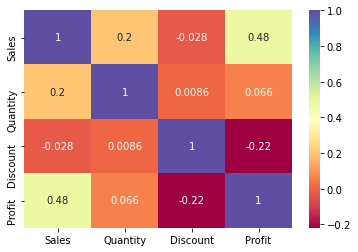

In [15]:
#Visualizing the correlation matrix via a heatmap
sns.heatmap(corr, annot=True, cmap='Spectral')

## Exploring Relationships between Different Attributes:
Now, lets look at the different relationships between the provided attributes with the numerical attrbiutes computed.

### Ship Mode vs Numerical Attributes:
Lets visualize the impact on discount and quantity on the basis of different Shipping Modes used.

The intuition behind using Discount and Quantity is that sometimes there are cases that special types of shippings offer discounts better than other classes. Other than that we need to find the average Quantity of Goods being transported via Shipping.

In [16]:
#Viewing the unique values in Ship Mode
data_df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

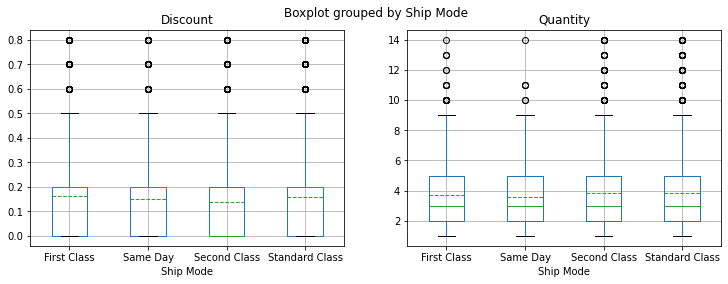

In [69]:
#Visualizing Ship Modes against Discount and Quantity
data_cols = ["Discount", "Quantity"] 
fig, axs = plt.subplots(1, 2, figsize=(12,4))
for i in range(len(data_cols)):
    data_df.boxplot(data_cols[i], by="Ship Mode", ax=axs[i], meanline=True, showmeans=True)
plt.show()

From the above graphical visualizations, we can conclude that the amount of average Discount per Shipping Mode is almost the same (between 0.1 and 0.2) as well as the Quantity of Goods supplied via Shipping (between 2 to 4) 

### Segments vs Numerical Attributes:
Let visualize the impact of different segments on the numerical attributes

In [70]:
#Viewing the unique segment classes and their counts
data_df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

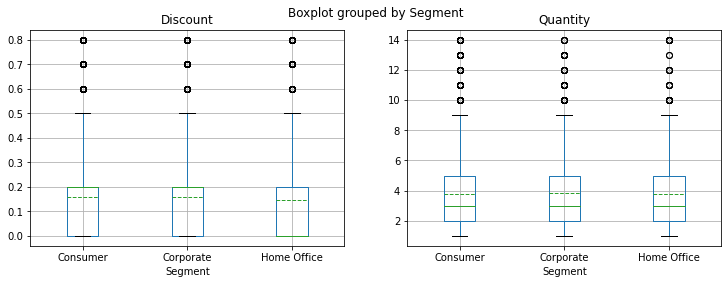

In [71]:
#Visualizing impact of Segments on the Discount and Quantity of Goods
data_cols = ["Discount", "Quantity"] 
fig, axs = plt.subplots(1, 2, figsize=(12,4))
for i in range(len(data_cols)):
    data_df.boxplot(data_cols[i], by="Segment", ax=axs[i], meanline=True, showmeans=True)
plt.show()

As expected, the Segments depict the same picture for the plots as the Shipping Modes. We find that the Quantity and Discount of a particular Good or set of Goods is not affected by the Shipping Mode or Segment of Shipping. We conclude that for each Shipping Mode as well as Segment, the discount offered for the Goods is between 0.1 to 0.2 percent whereas the Quantity of Goods shipped is mostly 3.

### Region vs Numerical Attributes:
Lets visualize the impact of a Region on the numerical attributes i.e. which region is the cause of the highest sales and profit and where are discounts offered.

In [72]:
#Viewing the different Region classes and their counts
data_df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

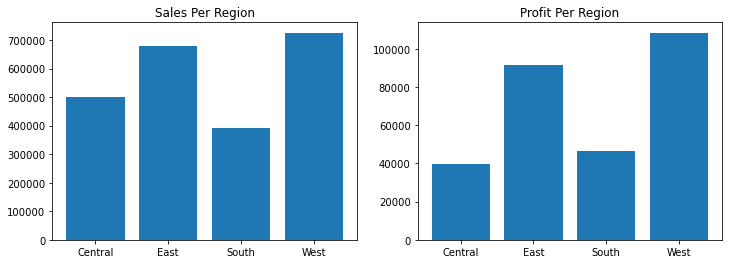

In [99]:
sales_per_region = data_df.groupby(["Region"])["Sales"].sum()
profit_per_region = data_df.groupby(["Region"])["Profit"].sum()


fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].bar(list(sales_per_region.index), sales_per_region)
axs[1].bar(list(profit_per_region.index), profit_per_region)

axs[0].title.set_text("Sales Per Region")
axs[1].title.set_text("Profit Per Region")
plt.show()

From above graph, we can see that the highest number of Sales are observed in the Western Region with High Profit as well. On the other hand we see that even though the sales in Central Region are higher than that of Southern Region, we still get lower Profit.